In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how = 'left', on = ['Mouse ID'])

# Display the data table for preview
merged_data_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
mice = merged_data_df['Mouse ID'].value_counts()
total_number_of_mice = len(mice)
total_number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df.loc[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989", :]
duplicate_mice_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data_df.drop(merged_data_df[merged_data_df['Mouse ID'] == 'g989'].index)
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
clean_mice_count = len(clean_mice)
clean_mice_count

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_groups = clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_df = regimen_groups['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, 'sem'])

# Assemble the resulting series into a single summary DataFrame.
# rename the columns to reflect the summary statistics
summary_stats_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev', 'Tumor Volume Std Err.']

# Summary statistics table
summary_stats_df


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std Dev  Tumor Volume Std Err.  
Drug Regimen                                               
Capomulin                 4.994774               0.329346  
Ceftamin                  6.268188               0.469821  
Infubinol                 6.567243               0.492236  
Ketapril                  8.279709               0.603860  
Naftisol                  8.134708               0.596466  
Placebo                   7.821003               0.581331  
Propriva                  6.622085               0.544332  
Ramicane                  4.846308               0.320955  
Stelasyn                  7.710419               0.573111  
Zoniferol                 6.966589               0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

agg_tumor_summary_df =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

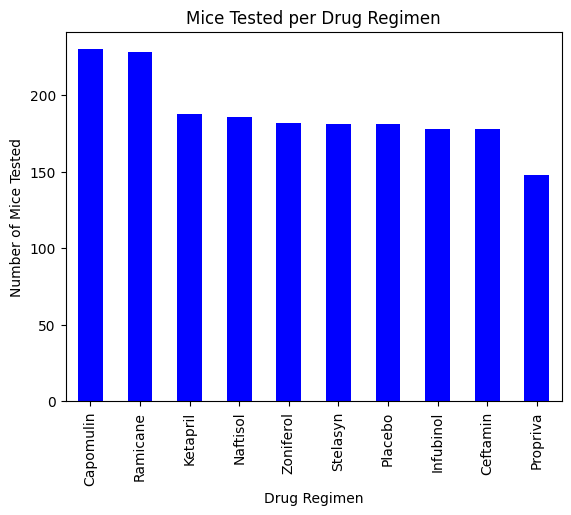

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
mice_tested = clean_df["Drug Regimen"].value_counts()

pd.plot = mice_tested.plot.bar(color='blue') 

# set x and y labels and chart title 
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Mice Tested per Drug Regimen')

# show the plot
plt.show()

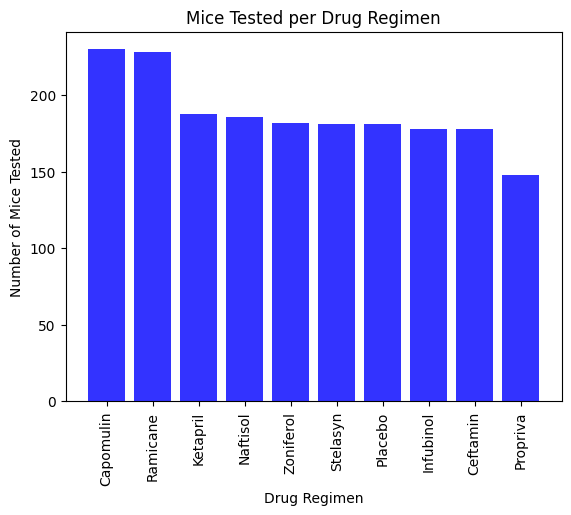

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_tested = clean_df["Drug Regimen"].value_counts()

x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color = 'blue', alpha =0.8)

# set x and y labels and chart title 
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation= 'vertical')
plt.title('Mice Tested per Drug Regimen')

# show the plot
plt.show()

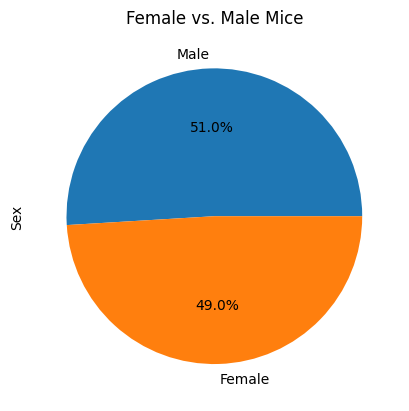

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# create a pie plot using pandas
pd.plot = gender_counts.plot(kind='pie', autopct='%1.1f%%')

# set the title of the plot
plt.title('Female vs. Male Mice')

# show the plot
plt.show()

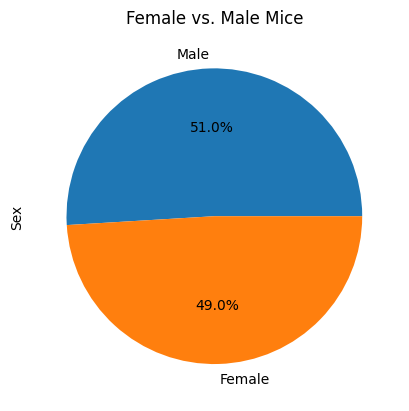

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# create a pie plot using matplotlib's pyplot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

# set axis and title of the plot
plt.ylabel('Sex')
plt.title('Female vs. Male Mice')

# show the plot
plt.show()



# Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = merged_data_df.groupby(["Mouse ID"]).max()
last_timepoint_reset = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = last_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(merged_data_df,on=['Mouse ID','Timepoint'],how="left")

In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def get_outliers(regimen):
    regimen_data = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    # calculate the quartiles and IQR for the tumor volumes
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    
    # determine the upper and lower bounds for potential outliers   
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # add subset 
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data   
    
# Determine outliers using upper and lower bounds
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


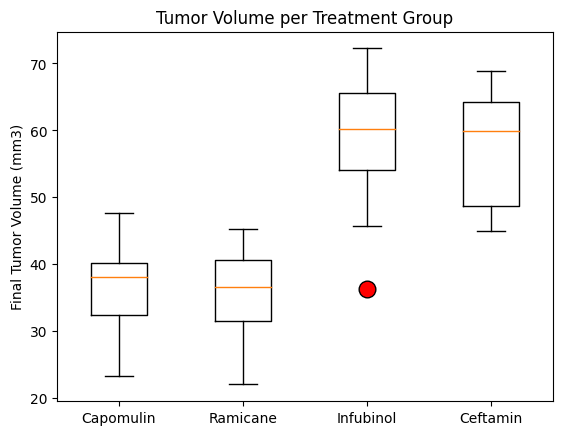

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume per Treatment Group')

# show the plot
plt.show()

# Line and Scatter PlotsÂ¶

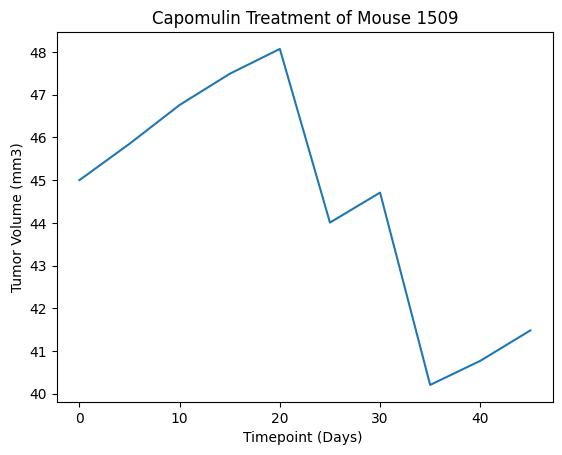

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# choose mouse ID to analyze
mouse_id = 'l509'

# Filter DataFrame to only include data for the chosen mouse and Capomulin treatment
mouse_df = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

# create a line plot of tumor volume vs. time point for the chosen mouse
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint (Days) ")
plt.ylabel("Tumor Volume (mm3)")

# show the plot
plt.show()


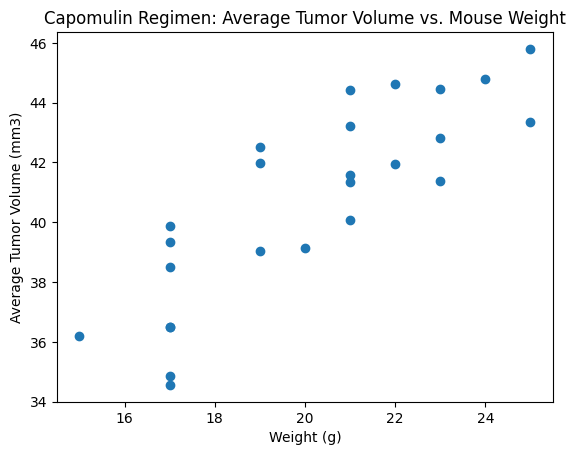

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# filter the DataFrame to only include data for the Capomulin treatment
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Average tumor volume and mouse weight for each mouse on the Capomulin regimen
avg_vol_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# create a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(avg_vol_df['Weight (g)'], avg_vol_df['Tumor Volume (mm3)'])
plt.title("Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# show the plot
plt.show()




# Correlation and Regression 

The correlation between mouse weight and average tumor volume is 0.84.


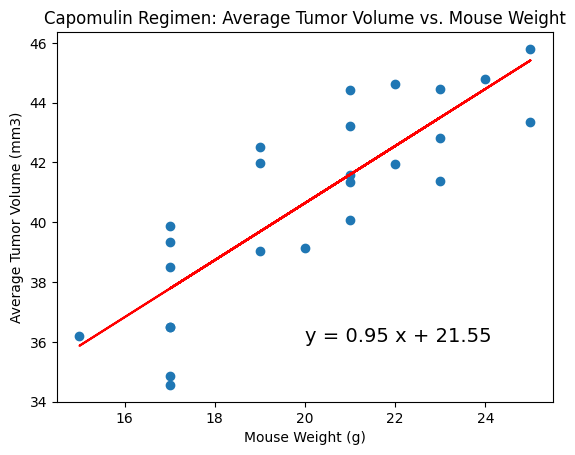

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(avg_vol_df['Weight (g)'], avg_vol_df['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation:.2f}.")

# calculate the linear regression model for mouse weight and average tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_vol_df['Weight (g)'], avg_vol_df['Tumor Volume (mm3)'])

# create the regression line equation
regress_values = avg_vol_df['Weight (g)'] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# create a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen, with the regression line
plt.scatter(avg_vol_df['Weight (g)'], avg_vol_df['Tumor Volume (mm3)'])
plt.plot(avg_vol_df['Weight (g)'], regress_values, "r-", label=line_eq)
plt.annotate(line_eq,(20,36), fontsize=14)
plt.title("Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# show the plot
plt.show()
